In [1]:
import numpy as np
import matplotlib.pyplot as plt

import DataProcessor

In [2]:
Gamma = 0.21  # Fracture energy (J/m^2)
E = 51e9      # Young's modulus (Pa)
nu = 0.25     # Poisson's ratio
C_f = 2404    # Rupture speed (m/s)
C_s = 2760    # Shear wave speed (m/s)
C_d = 4790    # Longitudinal wave speed (m/s)

In [3]:
filename = '../Data/p5993e.npz'


# data = np.load('/Users/hueyke/Downloads/p5993e.npz', allow_pickle=True)
data = np.load(filename, allow_pickle = True)
data = data["experiment"][()]

# run 1 is the second run named shs1
# event 2 is the thrid event
event = data['runs'][1]['events'][2]


# this is the raw strain in voltage
# gage factor is 2
# I forgot the excitation voltage... Let me get back to you. It's definitely <= 15V.
# you need to convert the raw voltage strain data in Voltage to strain.
# gage 6 is the 7th strain gage
# gages 0--12 are exy
# gages 13--15 are eyy of gage 0, 6, and 12
# using gage 6 gives you both exy and eyy to fit simultaneously 
# locations of each gage can be found at event['strain']['locations']
exy6 = event['strain']['original']['raw'][6]
# eyy6 = event['strain']['original']['raw'][12]


TIME_S = event['strain']['original']['time']

fs = len(TIME_S) / (np.max(TIME_S) - np.min(TIME_S))
print(fs)


STRAIN = DataProcessor.voltage_to_strain(exy6)
STRESS = DataProcessor.shear_strain_to_stress(E, nu, STRAIN)
STRESS = STRESS - STRESS[0]
STRESS_MPA = STRESS / 10**6
STRESS_MPA *= -1

100000.20025287168


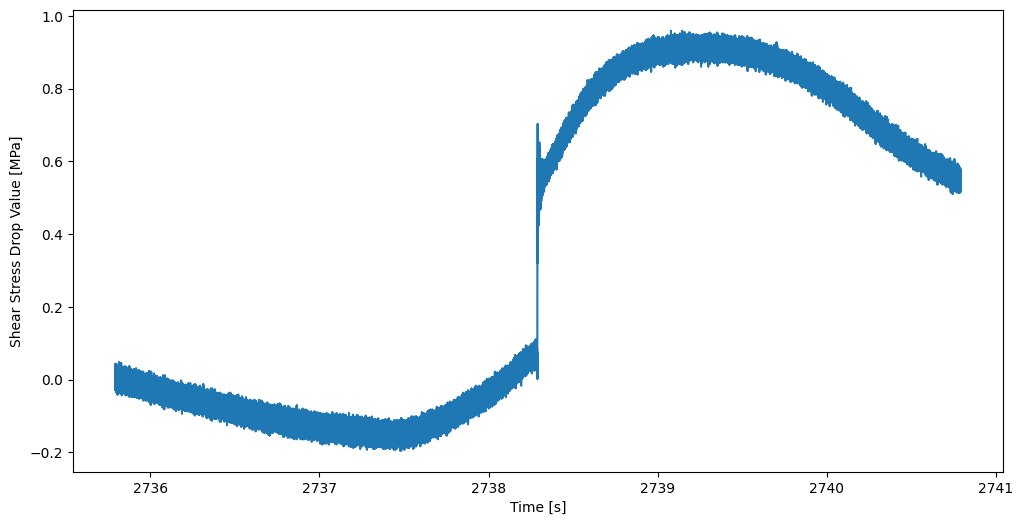

In [4]:

plt.figure(figsize = (12, 6))

plt.plot(TIME_S, STRESS_MPA, label=r'$\epsilon_{xy}$')
plt.xlabel('Time [s]')
plt.ylabel('Shear Stress Drop Value [MPa]')
# plt.plot(event['strain']['original']['time'], eyy6 - eyy6[0], label=r'$\epsilon_{yy}$')
plt.savefig('../Plot/p5972_test1.pdf', dpi = 300)
plt.show()